# Example Notebook for SeaDataNet Climatology data
Author(s): [Bjorn Backeberg](mailto:backeb@gmail.com) (backeb)

Creation date: 01-Aug-2019

Last updated: 06-Aug-2019

---

## Purpose

Load SeaDataNet Climatology computed from the SeaDataNet V1.1 aggregated regional datasets. Data can be downloaded [here](https://www.seadatanet.org/Products#/search?from=1&to=20).

Plot on map using cartopy

## Import necessary libraries

In [1]:
# EGI Datahub
import os
from fs.onedatafs import OnedataFS

import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

## Import dataset

In [4]:
%%time
# Create connection to Oneprovider
odfs = OnedataFS(os.environ['ONEPROVIDER_HOST'],
                 os.environ['ONECLIENT_ACCESS_TOKEN'],
                 force_direct_io=True)

arctic = xr.open_dataset(odfs.open('/notebooks-training-seadatanet/data/SDN_Clim_Arctic_Temperature.nc', 'rb'))
baltic = xr.open_dataset(odfs.open('/notebooks-training-seadatanet/data/SDN_Clim_BalticSea_Temperature.nc', 'rb'))

# display some of the metadata for ds1
print(ds1)

<xarray.Dataset>
Dimensions:                 (depth: 25, lat: 171, lon: 526, nv: 2, observations: 792522, time: 12)
Coordinates:
  * lon                     (lon) float32 -40.0 -39.8 -39.6 ... 64.6 64.8 65.0
  * lat                     (lat) float32 65.0 65.1 65.2 65.3 ... 81.8 81.9 82.0
  * depth                   (depth) float32 1750.0 1500.0 1400.0 ... 10.0 0.0
  * time                    (time) datetime64[ns] 1957-01-16 ... 1957-12-16
    obslon                  (observations) float64 ...
    obslat                  (observations) float64 ...
    obsdepth                (observations) float64 ...
    obstime                 (observations) datetime64[ns] ...
Dimensions without coordinates: nv, observations
Data variables:
    climatology_bounds      (time, nv) float32 ...
    CORRLEN                 (time, depth) float32 ...
    SNR                     (time, depth) float32 ...
    VARBACK                 (time, depth) float32 ...
    Temperature             (time, depth, lat, lon) 

In [5]:
# load the data into variables for plotting
lon_arctic = arctic.lon.values
lat_arctic = arctic.lat.values
depth_arctic = arctic.depth.values
time_arctic = arctic.time.values
temperature_arctic = arctic.Temperature.values

lon_baltic = baltic.lon.values
lat_baltic = baltic.lat.values
depth_baltic = baltic.depth.values
time_baltic = baltic.time.values
temperature_baltic = baltic.Temperature.values

## Plot on map using cartopy

/srv/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://www.ngdc.noaa.gov/mgg/shorelines/data/gshhs/oldversions/version2.2.0/GSHHS_shp_2.2.0.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


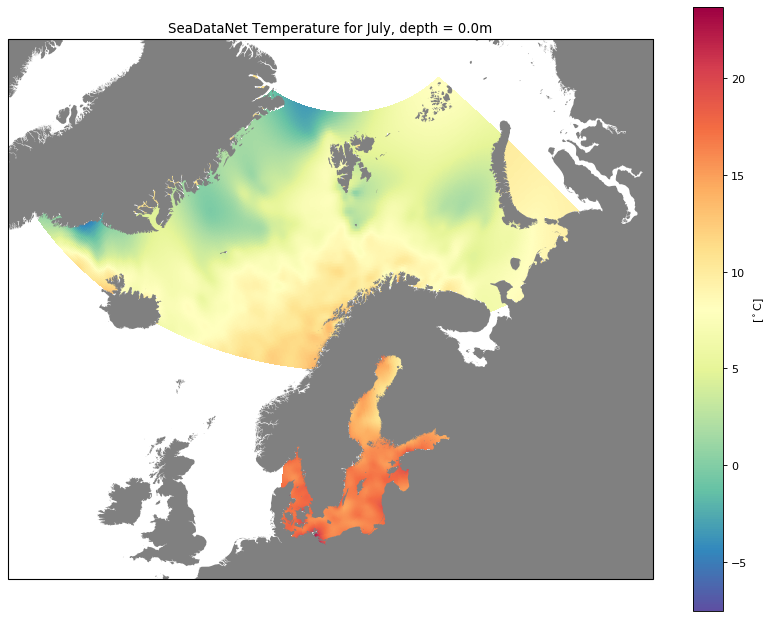

In [5]:
tm = 6 # set time to plot
dp = -1 # set depth to plot

# instantiate the figure
fig = plt.figure(figsize = (13, 10), dpi = 80) 

# set cartopy projection
central_longitude = np.median(np.concatenate((lon_arctic, lon_baltic), axis = None)).round()
central_latitude = np.median(np.concatenate((lat_arctic, lat_baltic), axis = None)).round()
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude = central_longitude,
                                                  central_latitude = central_latitude))
# define temperature colour axis bounds
bounds = [np.nanmin(np.concatenate((temperature_arctic, temperature_baltic), axis = None)), 
          np.nanmax(np.concatenate((temperature_arctic, temperature_baltic), axis = None))]

# plot
cm = ax.pcolormesh(lon_arctic, lat_arctic, temperature_baltic[tm,dp,:,:], 
              shading = 'gourand', 
              cmap = plt.cm.Spectral_r, 
              vmin = bounds[0], vmax = bounds[1],
              transform = ccrs.PlateCarree())

cm = ax.pcolormesh(lon_baltic, lat_baltic, temperature_baltic[tm,dp,:,:], 
              shading = 'gourand', 
              cmap = plt.cm.Spectral_r,
              vmin = bounds[0], vmax = bounds[1],
              transform = ccrs.PlateCarree())


plt.colorbar(cm, orientation = 'vertical').set_label('[$^\circ$C]')

# add a coastline
coastline = cfeature.GSHHSFeature(scale = 'intermediate', edgecolor = 'none', facecolor = 'grey')
ax.add_feature(coastline)

# add a title
plt.title("SeaDataNet Temperature for "
          +str((pd.to_datetime(time1[tm])).strftime('%B'))
          +", depth = "+str(depth1[dp])+"m")

plt.show()